In [8]:
#importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def epsilon_greedy_bandit(k=3, rounds=100, epsilon=0.1, true_probs=None, seed=None):
    np.random.seed(seed)

    estimates = np.zeros(k)      # Estimated average reward for each arm
    counts = np.zeros(k)         # Number of times each arm has been played
    chosen_arms = []
    reward_history = []
    estimates_history = []       # To store estimates after each round

    total_reward = 0

    for t in range(rounds):
        # Exploration vs exploitation
        if np.random.rand() < epsilon:
            arm = np.random.randint(0, k)
        else:
            arm = np.argmax(estimates)

        # Simulate reward based on true probabilities
        if true_probs is not None:
            reward = 1 if np.random.rand() < true_probs[arm] else 0
        else:
            reward = 0

        # Update counts and estimates
        counts[arm] += 1
        n = counts[arm]
        estimates[arm] += (reward - estimates[arm]) / n

        total_reward += reward
        reward_history.append(total_reward)
        chosen_arms.append(arm)
        estimates_history.append(estimates.copy())

    # Convert estimates history to array for easier plotting
    estimates_history = np.array(estimates_history)

    return reward_history, chosen_arms, estimates_history

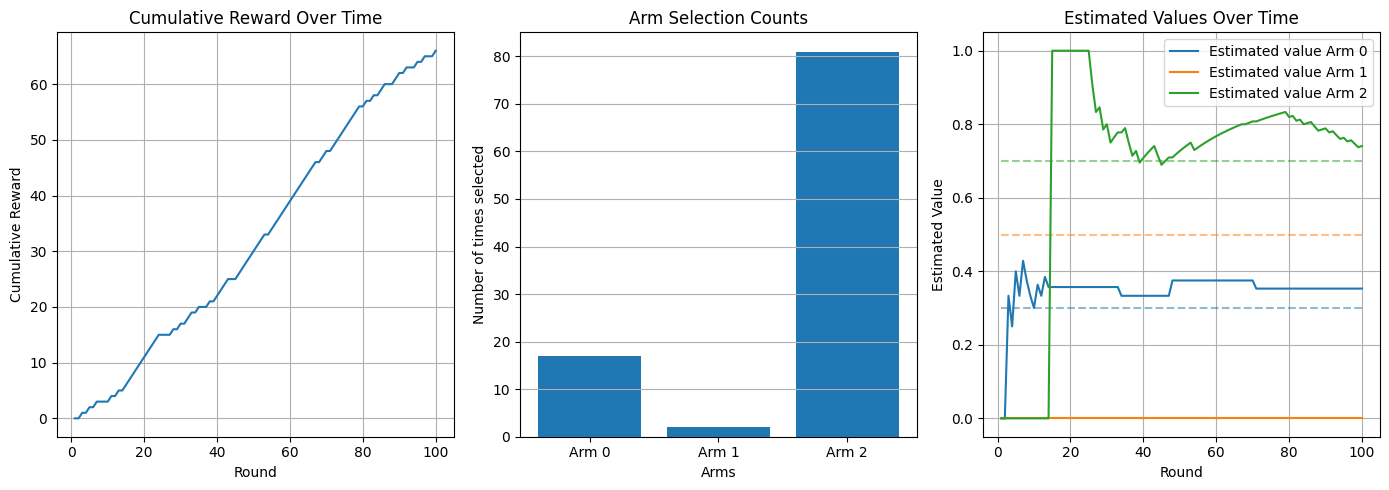

In [ ]:
def plot_results(reward_history, chosen_arms, estimates_history, true_probs=None):
    rounds = len(reward_history)
    k = estimates_history.shape[1]

    plt.figure(figsize=(14, 5))

    #Plot cumulative reward over time
    plt.subplot(1, 3, 1)
    plt.plot(range(1, rounds + 1), reward_history, label='Cumulative Reward')
    plt.xlabel('Round')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Reward Over Time')
    plt.grid(True)

    #Plot number of times each arm was chosen
    plt.subplot(1, 3, 2)
    counts = [chosen_arms.count(arm) for arm in range(k)]
    plt.bar(range(k), counts, tick_label=[f'Arm {i}' for i in range(k)])
    plt.xlabel('Arms')
    plt.ylabel('Number of times selected')
    plt.title('Arm Selection Counts')
    plt.grid(axis='y')

    #Plot estimated values of each arm over time
    plt.subplot(1, 3, 3)
    for arm in range(k):
        plt.plot(range(1, rounds + 1), estimates_history[:, arm], label=f'Estimated value Arm {arm}')
        if true_probs is not None:
            plt.hlines(true_probs[arm], 1, rounds, colors=f"C{arm}", linestyles='dashed', alpha=0.5)

    plt.xlabel('Round')
    plt.ylabel('Estimated Value')
    plt.title('Estimated Values Over Time')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

#Example usage:
true_probs_example = [0.3, 0.5, 0.7]
reward_history, chosen_arms, estimates_history = epsilon_greedy_bandit(k=3, rounds=100, epsilon=0.1, true_probs=true_probs_example, seed=42)

plot_results(reward_history, chosen_arms, estimates_history, true_probs=true_probs_example)


### Explanation of the plots:

- **Cumulative Reward Over Time:** Shows total reward gained as you play more rounds.
- **Arm Selection Counts:** How many times each slot machine was played.
- **Estimated Values Over Time:** The algorithm's evolving guess of the average reward for each machine. Dashed horizontal lines are the true probabilities (unknown to the algorithm), helping you see how estimates approach reality.

---


### Inferences Multi Arm Bandit Problem :
This problem demonstrates the difference between exploration and exploitation.
The given problem is that "Consider a scenario where you are faced with 3 slot machines,
each with different but unknown probabilities of returning a reward. You can
play a total of 100 rounds. Choose any multi-armed bandit algorithm you
have studied (e.g., ε-greedy, Upper Confidence Bound (UCB), Thompson
Sampling, or others) to decide which slot machine to play in each round.
Explain how your chosen algorithm helps balance exploration and
exploitation to maximize total rewards. Write a Python function to implement
your chosen algorithm. Assume the initial values of all slot machines are zero."


For this problem the algorithm that I've chosen to go with is the Epsilon-Greedy algorithm, it sets a default probability as epsilon i.e 0.1 and then choses either to go for exploartion or exploitation. If the probability reaches a desired value for the slot machine it plays there itself, using exploitation technique, but if it doesn't reach then it goes to another slot machine as exploration. On each round it updates its reward based on if it got a desirable result or an undesirable one. If it's an desirable one, the probability value of that slot is increased and if not then it decreases, when the probabily goes lower than the epilon value then it goes for another slot machine and this process keeps repeating until a desirable machine is found, in this case, we check for 100 rounds and found out that **ARM2** gives the best probabilty.
 